In [1]:
import sys
module_path = 'C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT'
sys.path.insert(1, module_path)
import Meta_SCMT
import numpy as np
import matplotlib.pyplot as plt

In [2]:
GP = {
    'dim' : 1, #dim : 1 or 2.
    'modes' : 1, #number of modes with in a single waveguide. modes <= 2 is usually good enough.
    'period' : 0.24,
    'res' : 20, #resolution within one period
    'downsample_ratio': 1, #between (0, 1] for the output periodic resolution, it will be int(round(downsample_ratio * res))
    'wh' : 0.8, #waveguide height
    'lam' : 0.65,
    'n_sub' : 1.46, #the refractive index of substrate.
    'n_wg' : 2.27,# the refractive index of waveguide
    'h_min' : 0.03, #h_min, and h_max define the range of the width of waveguide.
    'h_max' : 0.23,
    'dh' : 0.01, #the step size of h.
    'path' : "sim_cache_650nm/", #the inter state store path            
}
sim = Meta_SCMT.Sim(**GP)

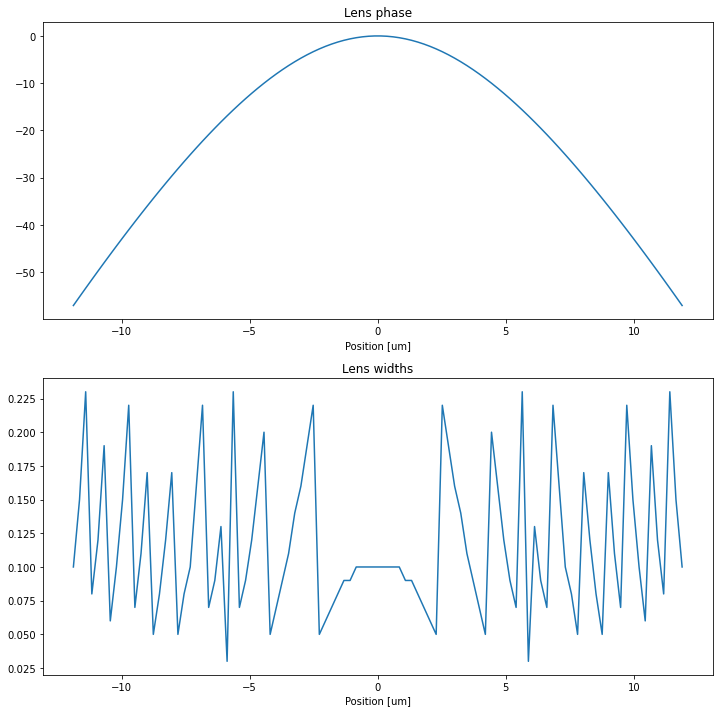

In [3]:
N = 100
theta = 0
NA = 0.8
prop_dis = 0.5 * N * GP['period'] * np.sqrt((1 - NA**2)/NA**2)
wgs = sim.PBA.design_lens(N, prop_dis, load = True)

In [4]:
sim.scmt.init_model(N, prop_dis, COUPLING = False, init_hs= wgs, far_field= True)
sim.scmt.optimize(notes = 'Sep9_N' + str(N) + '_no_coupling_init_PBA', lr = 0.1, steps = 1000, theta = theta)

  0%|                                                                                         | 0/1001 [00:00<?, ?it/s]

coo_sparse generated.
coo_sparse generated.
dis model input generated.
f_kernel generated.
initialized by loaded h_paras.
decay_rate: 0.79
the numerical aperture:  0.8 target spot size (number of points): 33.854166666666664


100%|██████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:50<00:00, 19.64it/s]

final lr: [0.009999999999999997]
parameters saved in. output_no_coupling/Sep9_N100_no_coupling_init_PBA/
the target is to maximize the intensity of the center.


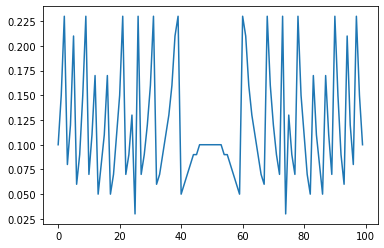

In [6]:
wgs_path = "output_no_coupling/Sep9_N100_no_coupling_init_PBA/"
wgs = np.genfromtxt(wgs_path + "waveguide_widths.csv", delimiter = ',')
x = wgs[:,0]
wgs = np.round(wgs[:,1],2)

plt.plot(wgs)

Fullwave resolution: 100
numerical aperture: 0.81
total running time: 1.084083307293225e-12
Initializing simulation...
Mesh step (micron): [1.00e-02, 1.00e-02, 1.00e-02].
Simulation domain in number of grid points: [2430, 1, 1210].
Total number of computational grid points: 2.94e+06.
Total number of time steps: 62547.
Estimated data size (GB) of monitor monitor: 0.1359.
Estimated data size (GB) of monitor monitor_1: 0.0001.
Estimated data size (GB) of monitor monitor_2: 0.0001.
Estimated data size (GB) of monitor monitor_3: 0.0001.
Estimated data size (GB) of monitor monitor_4: 0.0000.
Estimated data size (GB) of monitor monitor_5: 0.0001.


C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\fullwave_1D.py:203: UserWarning: Fullwave is expensive and slow. Only do fullwave on small devices. And low resolution can be inaccurate.
  warnings.warn(


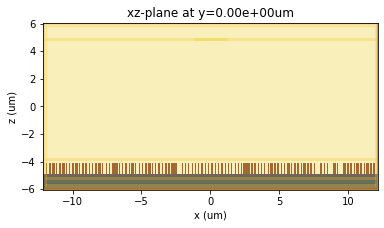

In [7]:
sim.fullwave.init_sim(prop_dis, N, wgs, res = 100, theta = theta, backend = 'tidy3d')

In [8]:
sim.fullwave.upload(task_name="Sep9_1D_no_coupling_lens_N" + str(N))
sim.fullwave.download(data_path="output_tidy3d/")

Using Tidy3D credentials from stored file
Uploading the json file...
Project 'Sep9_1D_no_coupling_lens_N100' status: success...                                  

Simulation domain Nx, Ny, Nz: [2430, 1, 1210]
Applied symmetries: [0, 0, 0]
Number of computational grid points: 2.9403e+06.
Using subpixel averaging: True
Number of time steps: 62547
Automatic shutoff factor: 1.00e-05
Time step (s): 1.7332e-17

Compute source modes time (s):     0.0610
Compute monitor modes time (s):    0.0591


Starting solver...
- Time step    995 / time 1.72e-14s (  1 % done), field decay: 1.00e+00
- Time step   2501 / time 4.33e-14s (  4 % done), field decay: 1.00e+00
- Time step   5003 / time 8.67e-14s (  8 % done), field decay: 2.35e-02
- Time step   7505 / time 1.30e-13s ( 12 % done), field decay: 1.22e-03
- Time step  10007 / time 1.73e-13s ( 16 % done), field decay: 5.27e-04
- Time step  12509 / time 2.17e-13s ( 20 % done), field decay: 3.87e-04
- Time step  15011 / time 2.60e-13s ( 24 % done), fiel

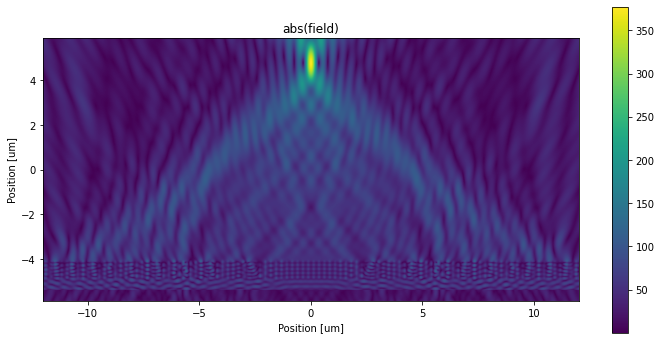

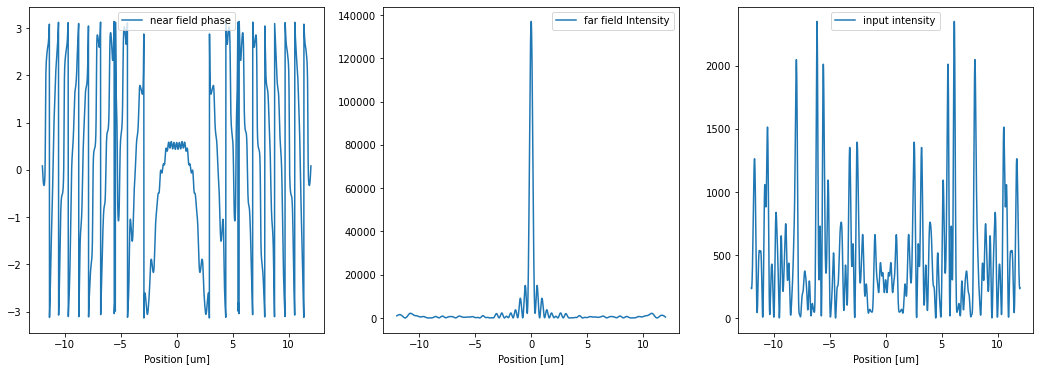

In [9]:
Ey_xz_raw, data_in, data_near, data_far = sim.fullwave.vis_monitor()

fwhm = 0.3200 um, 0.49 $\lambda$
f_kernel generated.
Model initialized.
using device:  cuda
I_in: 1.000000, I_out: 971.143188, I_out/I_in: 971.143188.
Ideal focal area power/total_far_field_power = 94.11%
fwhm_airy = 0.3400 um,  0.52 $\lambda$


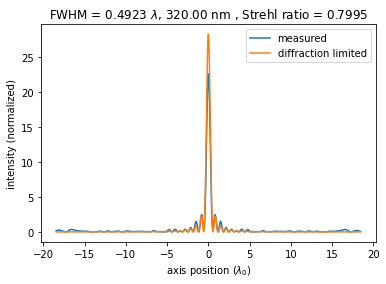

transmission efficiency = 81.79%
far field efficiency = 79.77%
focusing efficiency = 63.56%
focal area power/total_far_field_power = 79.68%


In [10]:
sim.fullwave.results_analysis()